In [1]:
import pandas as pd

from bs4 import BeautifulSoup
import requests
from urllib.parse import quote_plus

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
song = "Here's Where The Story Ends"
band = "Sundays"
year = "1990"

In [4]:
root_url = "https://www.lyricsfreak.com"
search_stem = "/search.php?q="

In [5]:
url = root_url + search_stem + song
response = requests.get(url)
response.status_code

200

In [6]:
response.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n    <!-- Google Analytics -->\n<script>\n    window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;\n    ga(\'create\', \'UA-9819958-1\', \'auto\', { \'allowLinker\': true });\n    ga(\'send\', \'pageview\');\n\n    ga(\'require\', \'linker\');\n    ga(\'linker:autoLink\', [\'lyricsfreak.com\']);\n    </script>\n<script async src=\'https://www.google-analytics.com/analytics.js\'></script>\n<!-- End Google Analytics -->\n    <!-- Yandex.Metrika counter -->\n<script type="text/javascript">\n    (function (d, w, c) {\n        (w[c] = w[c] || []).push(function() {\n            var params = {};\n            if (UGAPP.bidding.analytics.variation) {\n                params.dfp_variation = UGAPP.bidding.analytics.variation;\n            }\n            try {\n                w.yaCounter18984733 = new Ya.Metrika({id:18984733,\n                    webvisor:true,\n                    clickmap:true,\n                    trackLi

In [6]:
with open("web.html", mode='wb') as f:
    f.write(response.content)

In [7]:
soup = BeautifulSoup(response.text, 'html.parser')
indiatables = soup.find_all('a')

In [8]:
lyric_url = ''

iterable = iter(indiatables)
for link in iterable:
    if band.lower() in link.text.lower():
        link = next(iterable)
        if song.lower() in link.text.lower():
            if not lyric_url:
                lyric_url = link.get('href')
            else:
                print("Multile results found!")
lyric_url

'/s/sundays/heres+where+the+story+ends_20133607.html'

In [9]:
url = root_url + lyric_url
response = requests.get(url)
response.status_code

200

In [10]:
with open("web.html", mode='wb') as f:
    f.write(response.content)

In [11]:
soup = BeautifulSoup(response.text, 'html.parser')
indiatables = soup.find('div', {'id': 'content'})

In [12]:
lyrics = []

for div in indiatables:
    line = div.text.strip()
    if line:
        lyrics.append(line)

lyrics

['People I know places I go',
 'Make me feel tongue tied',
 'I can see how people look down',
 "They're on the inside",
 "Here's where the story ends",
 'People I see, weary of me',
 'Showing my good side',
 'I can see how people look down',
 "I'm on the outside",
 "Here's where the story ends",
 "Ooh here's where the story ends",
 "It's that little souvenir of a terrible year",
 'Which makes my eyes feel sore',
 'Oh I never should have said the books that you read',
 'Were all I loved',
 "It's that little souvenir of a terrible year",
 'Which makes me wonder why',
 "It's the memories of the shed that make me turn red",
 'Surprise surprise surprise',
 'Crazy I know, places I go',
 'Make me feel so tired',
 'I can see how people look down',
 "I'm on the outside",
 "Oh here's where the story ends",
 "Ooh here's where the story ends",
 "It's that little souvenir of a terrible year",
 'Which makes my eyes feel sore',
 "& who ever would've thought the books that you brought",
 'Were all I l

In [13]:
' '.join(lyrics)

"People I know places I go Make me feel tongue tied I can see how people look down They're on the inside Here's where the story ends People I see, weary of me Showing my good side I can see how people look down I'm on the outside Here's where the story ends Ooh here's where the story ends It's that little souvenir of a terrible year Which makes my eyes feel sore Oh I never should have said the books that you read Were all I loved It's that little souvenir of a terrible year Which makes me wonder why It's the memories of the shed that make me turn red Surprise surprise surprise Crazy I know, places I go Make me feel so tired I can see how people look down I'm on the outside Oh here's where the story ends Ooh here's where the story ends It's that little souvenir of a terrible year Which makes my eyes feel sore & who ever would've thought the books that you brought Were all I loved Oh the devil in me said go down to the shed I know where I belong But the only thing I ever really wanted to

In [3]:
def find_lyrics(band, song):
    root_url = "https://www.lyricsfreak.com"
    search_stem = "/search.php?q="

    url = root_url + search_stem + quote_plus(song)
    response = requests.get(url)
    if response.status_code != 200:
        print(response.status_code, url)
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    indiatables = soup.find_all('a')

    if not indiatables:
        print("No results found!", url)
        return []

    lyric_url = ''
    iterable = iter(indiatables)
    for link in iterable:
        if band.lower() in link.text.lower():
            link = next(iterable)
            if song.lower() in link.text.lower():
                if not lyric_url:
                    lyric_url = link.get('href')
                else:
                    print("Multile results found!")
                    return []
    
    if not lyric_url:
        print("No matching results.", url)
        return []

    url = root_url + lyric_url
    response = requests.get(url)
    response.status_code

    if response.status_code != 200:
        print(response.status_code, url)
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')
    indiatables = soup.find('div', {'id': 'content'})

    if not indiatables:
        print("No lyrics found!", url)
        return []
    
    lyrics = []

    for div in indiatables:
        line = div.text.strip()
        if line:
            lyrics.append(line)

    return lyrics

In [15]:
find_lyrics(band, song)

['People I know places I go',
 'Make me feel tongue tied',
 'I can see how people look down',
 "They're on the inside",
 "Here's where the story ends",
 'People I see, weary of me',
 'Showing my good side',
 'I can see how people look down',
 "I'm on the outside",
 "Here's where the story ends",
 "Ooh here's where the story ends",
 "It's that little souvenir of a terrible year",
 'Which makes my eyes feel sore',
 'Oh I never should have said the books that you read',
 'Were all I loved',
 "It's that little souvenir of a terrible year",
 'Which makes me wonder why',
 "It's the memories of the shed that make me turn red",
 'Surprise surprise surprise',
 'Crazy I know, places I go',
 'Make me feel so tired',
 'I can see how people look down',
 "I'm on the outside",
 "Oh here's where the story ends",
 "Ooh here's where the story ends",
 "It's that little souvenir of a terrible year",
 'Which makes my eyes feel sore',
 "& who ever would've thought the books that you brought",
 'Were all I l

### Let's see if we can find a failure point

In [4]:
import pandas as pd

df = pd.read_pickle('../data/final/audio_qualities.pkl')
df.columns

Index(['artist_id', 'artist_followers', 'artist_genres', 'artist_name',
       'artist_popularity', 'id', 'name', 'popularity', 'duration_ms',
       'explicit', 'artists', 'id_artists', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'year', 'first_artist_id', 'genre_doc'],
      dtype='object')

In [17]:
df['lyrics'] = ''
search_terms = df[['artist_name', 'name', 'year', 'lyrics']]

In [18]:
for index, row in search_terms.head(3).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    print("Searching for", song, "by", band)
    lyrics = find_lyrics(band, song)

    if lyrics:
        row['lyrics'] = ' '.join(lyrics)

Searching for Roodade Ghame Ulfat Unse - Dialogues by Guru Dutt
No matching results. https://www.lyricsfreak.com/search.php?q=Roodade+Ghame+Ulfat+Unse+-+Dialogues
Searching for Jab Ham Chale To Saya Bhi Apna - Dialogues by Guru Dutt
No matching results. https://www.lyricsfreak.com/search.php?q=Jab+Ham+Chale+To+Saya+Bhi+Apna+-+Dialogues
Searching for Teach Me Tonight by The De Castro Sisters
No matching results. https://www.lyricsfreak.com/search.php?q=Teach+Me+Tonight


May need to use a fuzzy string comparison.

In [3]:
from difflib import SequenceMatcher

def clean_string(s: str) -> str:
        "Remove stop words and whitespace"
        s = s.removeprefix('·').strip()
        s = s.lower()
        if s.startswith('the '):
            s = s[4:]
        s = s.replace(' the ', '')
        s = s.replace(' ', '')
        s = s.replace("'", "")

        return s

def string_likeness(main: str, second: str) -> float:
    "Get the likeness of two strings as a percentage"
    
    main = clean_string(main)
    second = clean_string(second)
    
    seq = SequenceMatcher(None, main, second)
    match = seq.find_longest_match()
    
    max_length = max(map(len, [main, second]))

    if match.size == max_length:
        return 1.
    else:
        return (1. * match.size) / max_length

In [8]:
string_likeness("The a Sundays", "Sundays")

0.875

In [21]:
indiatables = soup.select('div.lf-list__row a')
indiatables

[]

In [22]:
lyric_url = ''
max_score = 0

iterable = iter(indiatables)
for link in iterable:
    score = string_likeness(band, link.text)
    link = next(iterable)
    if song.lower() in link.text.lower():
        if score > max_score:
            max_score = score
            lyric_url = link.get('href')

lyric_url

''

In [4]:
def find_lyrics(band: str, song: str, min_similarity = 0.5) -> str:
    root_url = "https://www.lyricsfreak.com"
    search_stem = "/search.php?q="

    url = root_url + search_stem + quote_plus(song)
    response = requests.get(url)
    if response.status_code != 200:
        print(response.status_code, url)
        return [], -200, url

    soup = BeautifulSoup(response.text, 'html.parser')
    indiatables = soup.select('div.lf-list__row a')

    if not indiatables:
        # print("No results found!", url)
        return [], -1, url

    lyric_url = ''
    max_score = 0

    iterable = iter(indiatables)
    for link in iterable:
        score = string_likeness(band, link.text)
        link = next(iterable)
        if clean_string(song) in clean_string(link.text):
            if score < min_similarity:
                continue
            if score > max_score:
                max_score = score
                lyric_url = link.get('href')
    
    if not lyric_url:
        # print("No matching results.", url)
        return [], -2, url

    url = root_url + lyric_url
    response = requests.get(url)
    response.status_code

    if response.status_code != 200:
        # print(response.status_code, url)
        return [], -201, url
    
    soup = BeautifulSoup(response.text, 'html.parser')
    indiatables = soup.find('div', {'id': 'content'})

    if not indiatables:
        # print("No lyrics found!", url)
        return [], -3, url
    
    lyrics = []

    for div in indiatables:
        line = div.text.strip()
        if line:
            lyrics.append(line)

    return lyrics, max_score, url

In [24]:
find_lyrics(band, song)

(["Did you say I've got a lot to learn",
  "Well, don't think I'm trying not to learn",
  'Since this is the perfect spot to learn',
  'Teach me tonight',
  "Starting with the abc's of it",
  'Right down to the xyz of it',
  'Help me solve the mystery of it',
  'Teach me tonight',
  "The sky's a blackboard high above you",
  'If a shooting star goes by',
  "I'll use that star to write I love you",
  'A thousand times across the sky',
  "One thing isn't very clear, my love",
  'Should the teacher stand so near, my love',
  "Graduation's almost here, my love",
  'Teach me tonight',
  "One thing isn't very clear, my love",
  'Should the teacher stand so near, my love',
  "Graduation's almost here, my love",
  'Teach me tonight',
  'Teach me tonight'],
 1.0,
 'https://www.lyricsfreak.com/t/the+decastro+sisters/teach+me+tonight_20851184.html')

In [25]:
for index, row in search_terms.head(3).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    print("Searching for", song, "by", band)
    lyrics, _, _ = find_lyrics(band, song)

    if lyrics:
        row['lyrics'] = ' '.join(lyrics)

Searching for Roodade Ghame Ulfat Unse - Dialogues by Guru Dutt
Searching for Jab Ham Chale To Saya Bhi Apna - Dialogues by Guru Dutt
Searching for Teach Me Tonight by The De Castro Sisters


Now it is able to correctly get the lyrics for The DeCastro Sisters as listed on the site

In [26]:
for index, row in search_terms.head(10).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    if row['lyrics'] != '':
        continue

    print("Searching for", song, "by", band)
    result = find_lyrics(band, song)
    print(result)
    lyrics, _, _ = result

    if lyrics:
        search_terms.at[index, 'lyrics'] = ' '.join(lyrics)

Searching for Roodade Ghame Ulfat Unse - Dialogues by Guru Dutt
([], -1, 'https://www.lyricsfreak.com/search.php?q=Roodade+Ghame+Ulfat+Unse+-+Dialogues')
Searching for Jab Ham Chale To Saya Bhi Apna - Dialogues by Guru Dutt
([], -1, 'https://www.lyricsfreak.com/search.php?q=Jab+Ham+Chale+To+Saya+Bhi+Apna+-+Dialogues')
Searching for Teach Me Tonight by The De Castro Sisters
(["Did you say I've got a lot to learn", "Well, don't think I'm trying not to learn", 'Since this is the perfect spot to learn', 'Teach me tonight', "Starting with the abc's of it", 'Right down to the xyz of it', 'Help me solve the mystery of it', 'Teach me tonight', "The sky's a blackboard high above you", 'If a shooting star goes by', "I'll use that star to write I love you", 'A thousand times across the sky', "One thing isn't very clear, my love", 'Should the teacher stand so near, my love', "Graduation's almost here, my love", 'Teach me tonight', "One thing isn't very clear, my love", 'Should the teacher stand so

In [27]:
search_terms.head(10)

,artist_name,name,year,lyrics
0,Guru Dutt,Roodade Ghame Ulfat Unse - Dialogues,1957,
1,Guru Dutt,Jab Ham Chale To Saya Bhi Apna - Dialogues,1957,
2,The De Castro Sisters,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'..."
3,The De Castro Sisters,Boom Boom Boomerang,1955,[Chorus:] Just like a boomerang Boom boom boom...
4,The De Castro Sisters,Snowbound for Christmas,1955,Snowbound for Christmas That's what I'd like t...
5,The De Castro Sisters,Give Me Time,1955,
6,The De Castro Sisters,Cuckoo in the Clock,1955,
7,The De Castro Sisters,Cry Baby Blues,1955,
8,The De Castro Sisters,Let Your Love Walk In,1955,
9,The De Castro Sisters,Too Late Now,1955,Too late now to forget your smile The way we c...


Some annotations from the website are being introduced into the lyrics.

In [29]:
for index, row in search_terms.head(20).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    if row['lyrics'] != '':
        continue

    print("Searching for", song, "by", band)
    lyrics, _, _ = find_lyrics(band, song)

    if lyrics:
        search_terms.at[index, 'lyrics'] = ' '.join(lyrics)

Searching for Roodade Ghame Ulfat Unse - Dialogues by Guru Dutt
Searching for Jab Ham Chale To Saya Bhi Apna - Dialogues by Guru Dutt
Searching for Give Me Time by The De Castro Sisters
Searching for Cuckoo in the Clock by The De Castro Sisters
Searching for Cry Baby Blues by The De Castro Sisters
Searching for Let Your Love Walk In by The De Castro Sisters
Searching for Rockin' and Rollin' in Hawaii by The De Castro Sisters
Searching for Clutch Baliye by Sultaan
Searching for Ninna Poojege Bande Mahadeshwara by Raghu Dixit
Searching for Eno Ide by Raghu Dixit
Searching for Ee Tanuvu Ninnade by Raghu Dixit
Searching for Munjaane Manjalli by Raghu Dixit
Searching for Gudugudiya Sedi Nodo by Raghu Dixit
Searching for Ambar by Raghu Dixit
Searching for Just Maath Maathali by Raghu Dixit


Some of these tracks my be instrumental, so let's add 'instrumentalness' to the search terms, and only try to get lyrics for songs that Spotify believes are not instrumental.

In [5]:
# search_terms = df[['artist_name', 'name', 'year', 'lyrics', 'instrumentalness']]
search_terms = pd.read_pickle('../data/final/lyrics.pkl')
# search_terms['status'] = 0
# search_terms['url'] = ''
search_terms.head()

,artist_name,name,year,lyrics,instrumentalness,status,url,name_lang
571143,"""Ipi Ntombi"" 1975 Original Cast",Ipi Ntombi,1975,,0.000006,0.0,,it
571144,"""Ipi Ntombi"" 1975 Original Cast",Shosholoza,1975,Shosholoza (Shosholoza) Ku Lezontaba Stimela S...,0.000000,1.0,https://genius.com/songs/2071508/,en
571145,"""Ipi Ntombi"" 1975 Original Cast",The Warrior,1975,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...",0.003260,1.0,https://genius.com/songs/1140495/,en
571146,"""Ipi Ntombi"" 1975 Original Cast",Narration: Mama Tembu's Wedding,1975,,0.000000,-42.0,,en
156730,"""Jesus Christ Superstar"" Apostles - Original S...",The Last Supper,1970,"(Thursday night, the Last Supper)\n\nLook at a...",0.000000,1.0,https://genius.com/Jesus-christ-superstar-orig...,en


In [35]:
from langdetect import LangDetectException

def lang_detect(s):
    try:
        lang = detect(s)
        return lang
    except LangDetectException as e:
        return ''

import langid

def detect_language(text):
    try:
        lang, confidence = langid.classify(text)
        return lang
    except:
        # If the language detection fails, return None or handle the error as you wish.
        return None

In [9]:
# search_terms['name_lang'] = search_terms[['artist_name', 'name']].agg(' '.join, axis=1).apply(lang_detect)

In [22]:
search_terms['name_lang'].value_counts()

name_lang
en       197293
de        55414
es        53477
id        30038
pt        26437
it        22546
fr        14395
tr        13798
fi        10708
nl        10608
tl        10160
sv         9897
ca         8910
sw         8354
et         8192
no         7664
he         6873
pl         6508
so         5745
ko         5559
af         5346
ja         5326
th         5170
hu         5150
da         4926
ro         4906
lt         4650
ru         3420
hr         3249
sl         3029
sk         2924
cs         2870
cy         2763
bg         2097
vi         1876
lv         1364
sq          981
zh-cn       597
zh-tw       476
el          452
mk          376
uk          202
ar           79
fa            5
              1
Name: count, dtype: int64

In [31]:
for index, row in search_terms.head(100).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    if row['status'] != 0:
        continue

    if row['lyrics'] != '':
        continue

    if row['instrumentalness'] > 0.5:
        continue

    lyrics, status, url = find_lyrics(band, song)
    print(status, url)

    if lyrics:
        search_terms.at[index, 'lyrics'] = ' '.join(lyrics)
    
    search_terms.at[index, 'status'] = status
    search_terms.at[index, 'url'] = url

One potential issue for songs with common names or too few characters are multiple pages appearing on LyricsFreak, in which case only the first page of results will be considered. If too many results are being found, it may be better not to waste our time searching all of them, but we should flag these searches for future investigation.

This scenario seems to be very common when searching for songs that are not written in English, so in the case of our topic modeling, these will be left out anyway.

In [11]:
def search(max_searches = 10_000):
    searches = 0

    try:
        for index, row in search_terms.iterrows():
            band = row['artist_name'].strip()
            song = row['name'].strip()
            year = row['year']

            if row['status'] != 0:
                continue

            if row['instrumentalness'] > 0.5:
                continue
            
            if row['name_lang'] != 'en':
                continue

            if searches >= max_searches:
                break
            searches += 1
            
            lyrics, status, url = find_lyrics(band, song)

            if status <= -200:
                print("No longer returning 200")
                return searches

            # print(status, url)

            if lyrics:
                search_terms.at[index, 'lyrics'] = ' '.join(lyrics)
            
            search_terms.at[index, 'status'] = status
            search_terms.at[index, 'url'] = url

    except Exception as e:
        print(str(e))
        return searches

    return searches

In [18]:
search()

10000

In [19]:
search_terms.head()

,artist_name,name,year,lyrics,instrumentalness,status,url,name_lang
0,Guru Dutt,Roodade Ghame Ulfat Unse - Dialogues,1957,,0.000000,-1.0,https://www.lyricsfreak.com/search.php?q=Rooda...,pt
1,Guru Dutt,Jab Ham Chale To Saya Bhi Apna - Dialogues,1957,,0.243000,-1.0,https://www.lyricsfreak.com/search.php?q=Jab+H...,id
2,The De Castro Sisters,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...",0.000000,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...,en
3,The De Castro Sisters,Boom Boom Boomerang,1955,[Chorus:] Just like a boomerang Boom boom boom...,0.000009,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...,af
4,The De Castro Sisters,Snowbound for Christmas,1955,Snowbound for Christmas That's what I'd like t...,0.000000,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...,en


In [11]:
search_terms.to_pickle('../data/final/lyrics.pkl')

Let's examine the few lyrics that we were able to scape

In [8]:
lyrics = search_terms.loc[(search_terms['status'] > 0.5)]

In [9]:
lyrics.shape

(55902, 8)

In [10]:
lyrics['lyrics']

571144    Shosholoza (Shosholoza) Ku Lezontaba Stimela S...
571145    [Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...
156730    (Thursday night, the Last Supper)\n\nLook at a...
66031     [WORKERS] At the end of the day you're another...
66034     [The Wedding Chorale] [Marius and Cosette lead...
                                ...                        
6759      Je suis membre viscéral Membre du règne animal...
6757      Quoi ma gueule Qu'est-ce qu'elle a ma gueule Q...
193893    From a little light of love I was born and in ...
306121    (feat. Charlotte Gainsbourg) If excessif, accr...
3445      [Verse] Ïîñëåäíà íîù, à óòðå ìå î÷àêâà ïúò. Ïî...
Name: lyrics, Length: 55902, dtype: object

In [38]:
lyrics['lang'] = lyrics['lyrics'].apply(detect_language)

C:\Users\levij\AppData\Local\Temp\ipykernel_600\3976220329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics['lang'] = lyrics['lyrics'].apply(detect_language)


In [39]:
lyrics[['artist_name', 'name', 'lyrics', 'lang']]

,artist_name,name,lyrics,lang
571144,"""Ipi Ntombi"" 1975 Original Cast",Shosholoza,Shosholoza (Shosholoza) Ku Lezontaba Stimela S...,zu
571145,"""Ipi Ntombi"" 1975 Original Cast",The Warrior,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...",en
156730,"""Jesus Christ Superstar"" Apostles - Original S...",The Last Supper,"(Thursday night, the Last Supper)\n\nLook at a...",en
66031,"""Les Misérables Original London Cast"" Ensemble",At The End Of The Day,[WORKERS] At the end of the day you're another...,en
66034,"""Les Misérables Original London Cast"" Ensemble",Wedding Chorale / Beggars At the Feast,[The Wedding Chorale] [Marius and Cosette lead...,en
...,...,...,...,...
6759,Éric Lapointe,Tendre fesse,Je suis membre viscéral Membre du règne animal...,fr
6757,Éric Lapointe,Ma gueule,Quoi ma gueule Qu'est-ce qu'elle a ma gueule Q...,fr
193893,Éric Serra,Little Light Of Love,From a little light of love I was born and in ...,en
306121,Étienne Daho,If,"(feat. Charlotte Gainsbourg) If excessif, accr...",fr


In [40]:
docs = lyrics[['name', 'year', 'lyrics']].loc[lyrics['lang'] == 'en']
docs.drop_duplicates(inplace=True)
docs

,name,year,lyrics
571145,The Warrior,1975,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [..."
156730,The Last Supper,1970,"(Thursday night, the Last Supper)\n\nLook at a..."
66031,At The End Of The Day,1985,[WORKERS] At the end of the day you're another...
66034,Wedding Chorale / Beggars At the Feast,1985,[The Wedding Chorale] [Marius and Cosette lead...
208538,Bugle Call Rag,1925,You're bound to fall for the bugle call; You'r...
...,...,...,...
152268,Lobotomy For Dummies,2006,You can lie to me and say it's you I adore You...
152266,Hello Tomorrow,2003,Hello tomorrow and good-bye to yesterday We've...
152264,Falling Apart,2003,Stutter step through another trap by deception...
506745,Youth,2020,Do you recall the things That used to give us ...


In [41]:
import nltk

nltk.download('stopwords')
stopword = set(map(lambda s: s.replace("'", ""),
                   nltk.corpus.stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\levij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We'll start by cleaning the text, making everything lowercase, and removing punctuation from the lyrics and stop words.

In [42]:
import re

def clean_lyrics(string: str) -> list:
    text = string.lower().strip()
    text = re.sub("\[.*?\]", '', text) # removes the annotations
    text = re.sub("[^\w|\s-]", '', text) # keep only words and spaces
    text = re.sub("\s+", ' ', text) # remove extra spaces
    text = text.strip()
    
    result = list(filter(lambda word: word not in stopword, text.split(" ")))
    
    return result

In [43]:
docs['lyrics'].iloc[0]

"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [Verse 1] You run, run, run away It's your heart that you betray Feeding on your hungry eyes I bet you're not so civilized Well, isn't love primitive? A wild gift that you wanna give Break out of captivity [Pre-Chorus] And follow me stereo jungle child Love is the kill Your heart's still wild [Chorus] Shootin' at the walls of heartache Bang, bang! I am the warrior Well, I am the warrior And heart to heart you'll win If you survive the warrior The warrior The warrior"

In [44]:
' '.join(clean_lyrics(docs['lyrics'].iloc[0]))

'ohh oh oh oh ohh oh ooh oh oh run run run away heart betray feeding hungry eyes bet civilized well love primitive wild gift wanna give break captivity follow stereo jungle child love kill hearts still wild shootin walls heartache bang bang warrior well warrior heart heart win survive warrior warrior warrior'

In [45]:
docs['words'] = docs['lyrics'].apply(clean_lyrics)

In [46]:
docs.head()

,name,year,lyrics,words
571145,The Warrior,1975,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...","[ohh, oh, oh, oh, ohh, oh, ooh, oh, oh, run, r..."
156730,The Last Supper,1970,"(Thursday night, the Last Supper)\n\nLook at a...","[thursday, night, last, supper, look, trials, ..."
66031,At The End Of The Day,1985,[WORKERS] At the end of the day you're another...,"[end, day, another, day, olderand, thats, say,..."
66034,Wedding Chorale / Beggars At the Feast,1985,[The Wedding Chorale] [Marius and Cosette lead...,"[ring, bells, upon, day, days, may, angels, lo..."
208538,Bugle Call Rag,1925,You're bound to fall for the bugle call; You'r...,"[bound, fall, bugle, call, gonna, brag, bout, ..."


In [47]:
tidy = docs.explode(['words'])
tidy

,name,year,lyrics,words
571145,The Warrior,1975,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...",ohh
571145,The Warrior,1975,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...",oh
571145,The Warrior,1975,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...",oh
571145,The Warrior,1975,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...",oh
571145,The Warrior,1975,"[Intro] Ohh, oh, oh, oh, ohh Oh, ooh, oh, oh [...",ohh
...,...,...,...,...
193893,Little Light Of Love,1997,From a little light of love I was born and in ...,religion
193893,Little Light Of Love,1997,From a little light of love I was born and in ...,little
193893,Little Light Of Love,1997,From a little light of love I was born and in ...,light
193893,Little Light Of Love,1997,From a little light of love I was born and in ...,love


In [48]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [49]:
dictionary = Dictionary(docs['words'])
print(dictionary.token2id)

{'away': 0, 'bang': 1, 'bet': 2, 'betray': 3, 'break': 4, 'captivity': 5, 'child': 6, 'civilized': 7, 'eyes': 8, 'feeding': 9, 'follow': 10, 'gift': 11, 'give': 12, 'heart': 13, 'heartache': 14, 'hearts': 15, 'hungry': 16, 'jungle': 17, 'kill': 18, 'love': 19, 'oh': 20, 'ohh': 21, 'ooh': 22, 'primitive': 23, 'run': 24, 'shootin': 25, 'stereo': 26, 'still': 27, 'survive': 28, 'walls': 29, 'wanna': 30, 'warrior': 31, 'well': 32, 'wild': 33, 'win': 34, '-': 35, 'admired': 36, 'also': 37, 'always': 38, 'ambition': 39, 'animal': 40, 'answers': 41, 'apostle': 42, 'around': 43, 'awake': 44, 'betrays': 45, 'better': 46, 'blank': 47, 'blood': 48, 'body': 49, 'bread': 50, 'brought': 51, 'care': 52, 'chosen': 53, 'christ': 54, 'common': 55, 'could': 56, 'criminal': 57, 'cut': 58, 'dead': 59, 'denies': 60, 'deny': 61, 'deserve': 62, 'despise': 63, 'die': 64, 'died': 65, 'dining': 66, 'disturb': 67, 'dramatics': 68, 'drink': 69, 'eat': 70, 'end': 71, 'evening': 72, 'every': 73, 'faces': 74, 'faded'

In [50]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=5000)

In [51]:
corpus = [dictionary.doc2bow(doc) for doc in docs['words']]

In [53]:
import matplotlib.pyplot as plt

In [35]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers=4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())

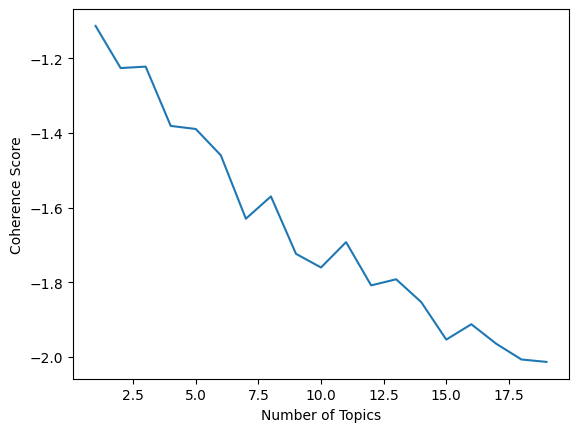

In [36]:
_ = plt.plot(topics, score)
_ = plt.xlabel('Number of Topics')
_ = plt.ylabel('Coherence Score')
plt.show()

In [37]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers=4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = docs['words'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())

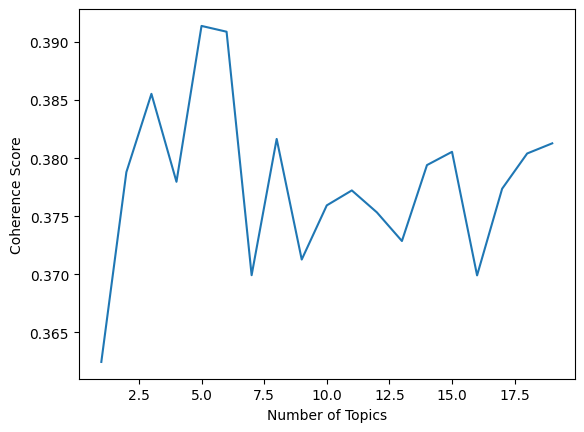

In [38]:
_ = plt.plot(topics, score)
_ = plt.xlabel('Number of Topics')
_ = plt.ylabel('Coherence Score')
plt.show()

In [45]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=6, workers = 4, passes=100)

In [46]:
lda_model.print_topics(-1)

[(0,
  '0.009*"world" + 0.009*"see" + 0.008*"light" + 0.008*"night" + 0.008*"life" + 0.008*"eyes" + 0.008*"like" + 0.008*"come" + 0.007*"away" + 0.007*"us"'),
 (1,
  '0.025*"know" + 0.016*"time" + 0.015*"never" + 0.014*"cant" + 0.013*"ive" + 0.013*"way" + 0.012*"say" + 0.011*"one" + 0.011*"go" + 0.011*"see"'),
 (2,
  '0.014*"man" + 0.013*"well" + 0.012*"old" + 0.010*"said" + 0.010*"little" + 0.010*"home" + 0.009*"hes" + 0.008*"day" + 0.007*"back" + 0.007*"town"'),
 (3,
  '0.023*"like" + 0.018*"got" + 0.018*"get" + 0.015*"la" + 0.012*"aint" + 0.009*"ya" + 0.009*"back" + 0.008*"cause" + 0.008*"know" + 0.008*"man"'),
 (4,
  '0.048*"oh" + 0.043*"yeah" + 0.034*"baby" + 0.027*"gonna" + 0.025*"get" + 0.024*"got" + 0.022*"wanna" + 0.019*"come" + 0.016*"go" + 0.015*"hey"'),
 (5,
  '0.107*"love" + 0.023*"heart" + 0.022*"baby" + 0.020*"know" + 0.018*"ill" + 0.014*"oh" + 0.014*"want" + 0.014*"need" + 0.012*"never" + 0.011*"one"')]

In [47]:
lda_model[corpus][0]

[(0, 0.23454913), (1, 0.36562723), (4, 0.056557935), (5, 0.33791915)]

In [48]:
import pyLDAvis
import pyLDAvis.gensim_models

In [49]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

In [50]:
pyLDAvis.save_html(lda_display, 'index6.html')